# Explore here

In [1]:
import pandas as pd
import numpy as np
import eda_functions as ed

In [2]:
# importar el dataframe
path = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Informacion del dataframe
ed.df_info(df)

,nunique,nulls,percent_nulls,Dtype,non_null,total_values
age,47,0,0.0,int64,1338,1338
sex,2,0,0.0,object,1338,1338
bmi,548,0,0.0,float64,1338,1338
children,6,0,0.0,int64,1338,1338
smoker,2,0,0.0,object,1338,1338
region,4,0,0.0,object,1338,1338
charges,1337,0,0.0,float64,1338,1338


Dtype
object     3
int64      2
float64    2
Name: count, dtype: int64

El dataframe tiene 1338 filas y 7 columnas
Hay 1 valores duplicados


In [ ]:
# Eliminamos el Duplicado
df = df.drop_duplicates()

Las columnas sex y smoker se convertiran en binarias {0, 1} facilmente.

Con la columna region se usara target encoding

In [6]:
df['smoker_label'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)
df['gender_label'] = df['sex'].apply(lambda x: 0 if x == 'male' else 1)

In [7]:
df = ed.target_encoding(df, 'region', 'charges', smooth_coef=0)

In [8]:
columns_list = ['age', 'bmi', 'children','smoker_label', 'gender_label', 'encoded_region']

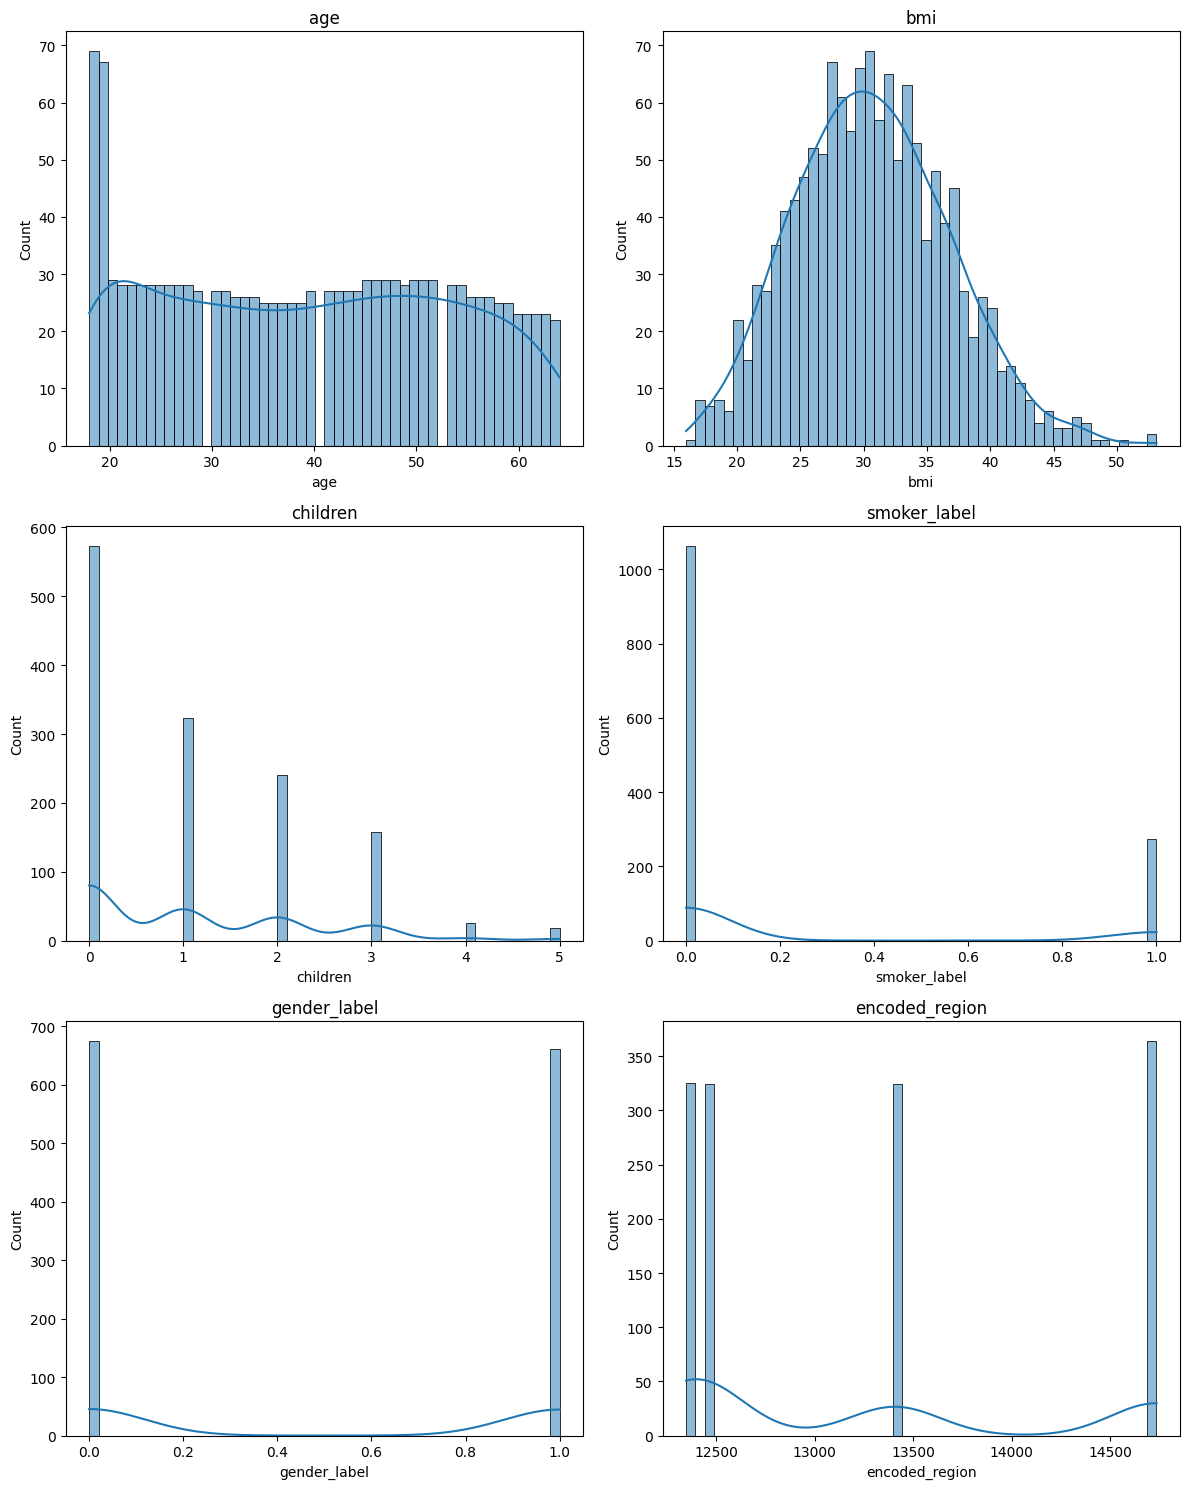

In [12]:
ed.multi_histplot(df, columns_list,n_rows=3, n_cols=2, fig_size=(12, 15))

In [30]:
columns_list = ['age', 'bmi', 'children','smoker_label','charges', 'gender_label', 'encoded_region']

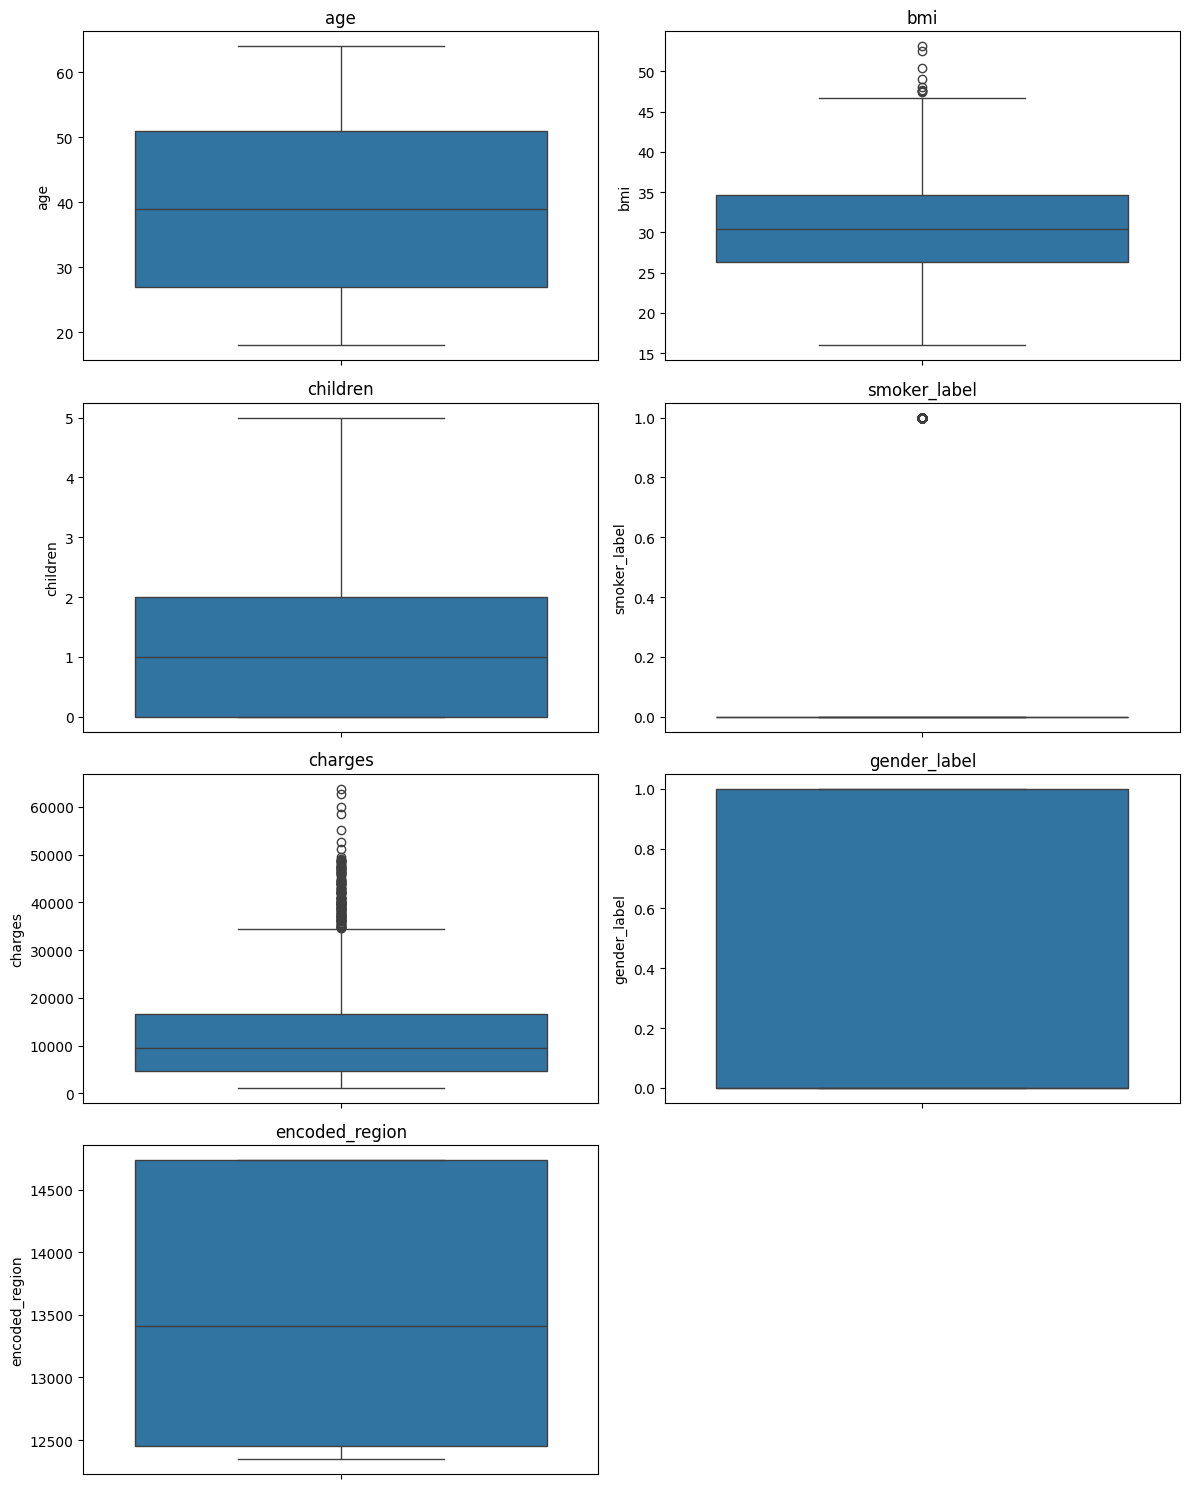

In [33]:
ed.multi_boxplot(df, columns_list, 4, 2, fig_size=(12, 15))

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_label', 'gender_label', 'encoded_region'],
      dtype='object')

In [21]:
df = df[['age', 'bmi', 'children','charges',
       'smoker_label', 'gender_label', 'encoded_region']]

In [24]:
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(df.drop('charges', axis=1), df['charges'], test_size=0.2)

In [28]:
# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calcular RMSE
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f'mean_absolute_percentage_error(MAPE): {mape}')


Mean Absolute Error (MAE): 4369.030847176709
Mean Squared Error (MSE): 40020807.38126466
Root Mean Squared Error (RMSE): 6326.200074394159
R-squared (R²): 0.7355836373119604
mean_absolute_percentage_error(MAPE): 0.4295885475793117


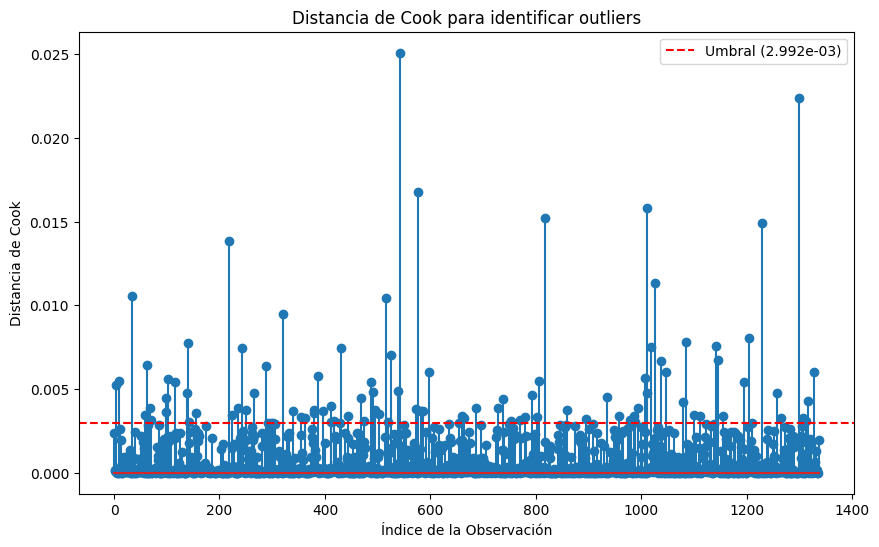

In [39]:
import statsmodels.api as sm

# Suponiendo que df es tu DataFrame
X = df[['age', 'bmi', 'children', 'smoker_label', 'gender_label', 'encoded_region']]  # Características
y = df['charges']  # Variable objetivo

# Agregar una constante a X para el término intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener las medidas de influencia
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Graficar las distancias de Cook para visualizar puntos influyentes
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.stem(cooks_d)
plt.title('Distancia de Cook para identificar outliers')
plt.xlabel('Índice de la Observación')
plt.ylabel('Distancia de Cook')
threshold = 4 / len(X)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Umbral ({threshold:.3e})')
plt.legend()
plt.show()



In [40]:
import numpy as np

# Umbral común para identificar outliers influyentes
threshold = 4 / len(X)
outlier_indices = np.where(cooks_d > threshold)[0]

# Mostrar los índices de los outliers
print("Índices de outliers según la distancia de Cook:", outlier_indices)


Índices de outliers según la distancia de Cook: [   3    9   34   58   62   69   70   98   99  102  115  138  140  142
  156  219  224  235  242  250  266  289  321  340  355  362  379  380
  387  397  411  412  417  430  443  468  474  488  491  494  502  516
  520  526  539  543  573  577  582  586  598  660  663  687  729  738
  753  769  779  792  802  805  818  859  895  935  958  979  981  986
  988  993 1007 1010 1011 1018 1026 1038 1046 1079 1084 1099 1111 1141
 1145 1155 1194 1205 1229 1257 1264 1299 1306 1313 1316 1327]


In [41]:
# Eliminar outliers de los datos
X_clean = X.drop(index=outlier_indices)
y_clean = y.drop(index=outlier_indices)

# Opcional: re-ajustar el modelo con datos limpios
model_clean = sm.OLS(y_clean, X_clean).fit()
print(model_clean.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1138.
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        01:37:49   Log-Likelihood:                -12198.
No. Observations:                1241   AIC:                         2.441e+04
Df Residuals:                    1234   BIC:                         2.445e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.13e+04   1813.380     -6.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calcular RMSE
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f'mean_absolute_percentage_error(MAPE): {mape}')

Mean Absolute Error (MAE): 2840.896658289312
Mean Squared Error (MSE): 17733005.47704903
Root Mean Squared Error (RMSE): 4211.057524785078
R-squared (R²): 0.8779165064531265
mean_absolute_percentage_error(MAPE): 0.3151153967030903


In [46]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo con regularización
model = LassoCV(cv=25).fit(X_train_scaled, y_train)
print("Mejor valor de alpha:", model.alpha_)
print("R^2 en entrenamiento:", model.score(X_train_scaled, y_train))

# Predicción y evaluación
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MSE en prueba:", mse)
print("MAPE en prueba:", mape)

Mejor valor de alpha: 88.74146857921046
R^2 en entrenamiento: 0.8375385869160614
MSE en prueba: 17903570.942409143
MAPE en prueba: 0.3132583597115641


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Supongamos que df es tu DataFrame y ya tienes definidas tus características
X = df[['age', 'bmi', 'children', 'smoker_label', 'gender_label', 'encoded_region']]  # ejemplo de características

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Calcular VIF para cada característica
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          feature         VIF
0           const  199.932201
1             age    1.016255
2             bmi    1.069168
3        children    1.003644
4    smoker_label    1.012067
5    gender_label    1.008917
6  encoded_region    1.061157


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Preparar los datos
X = df[['age', 'bmi', 'children', 'smoker_label', 'gender_label', 'encoded_region']]
y = df['charges']

# Crear un pipeline que primero escala los datos y luego aplica Ridge
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Definir el grid de hiperparámetros a probar
param_grid = {
    'ridge__alpha': np.arange(0.01, 100, 0.1) # alpha es el parámetro de regularización
}

# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', verbose=1)
grid_search.fit(X, y)

# Mejores parámetros y mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (MSE):", -grid_search.best_score_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Mejores parámetros: {'ridge__alpha': 0.01}
Mejor score (MSE): 0.4261506706536483
